In [7]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

def plot_fitness_benchmarks(path: str = "../assets/benchmarks/cart-pole-default", label:str="", fallback_fitness:float=-200.):
    # Load programs from JSON file.
    with open(Path(path) / "plot.json") as f:
        programs = (json.load(f))

    # Extract fitness scores and generation information from programs.
    fitness_scores = []
    generations = []
    for i, program_group in enumerate(programs):
        generation_fitness = []
        for program in program_group:
            if "program" in program:
                program = program["program"]

            if "Valid" in program["fitness"]:
                fitness = program["fitness"]["Valid"]
            else:
                fitness = fallback_fitness
            generation_fitness.append(fitness)

        fitness_scores.append(generation_fitness)
        generations.append(i)

    # Compute statistics of fitness scores.
    mean_fitness = [np.mean(generation_fitness) for generation_fitness in fitness_scores]
    max_fitness = [np.max(generation_fitness) for generation_fitness in fitness_scores]
    min_fitness = [np.min(generation_fitness) for generation_fitness in fitness_scores]
    median_fitness = [np.median(generation_fitness) for generation_fitness in fitness_scores]

    # Plot fitness scores as lines.
    fig, ax = plt.subplots()

    title = "Fitness Evolution"

    if label != "":
        title = f"{title} ({label})"

    ax.plot(generations, max_fitness, label='Max')
    ax.plot(generations, mean_fitness, label='Mean')
    ax.plot(generations, median_fitness, label='Median')
    ax.plot(generations, min_fitness, label='Min')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.grid(visible=True, which="both")
    ax.set_title(title)
    ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
    plt.tight_layout()


    plt.show(fig)


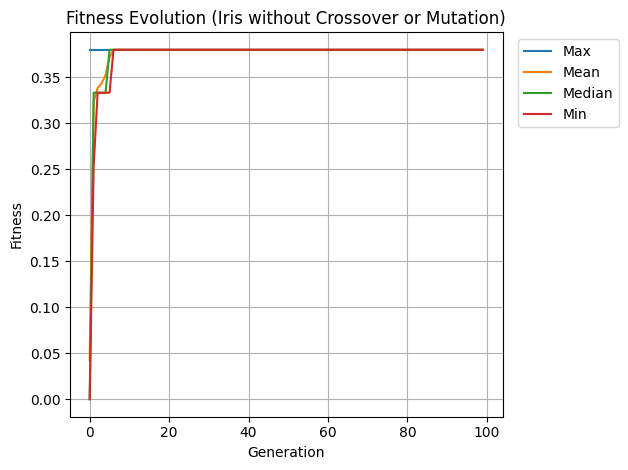

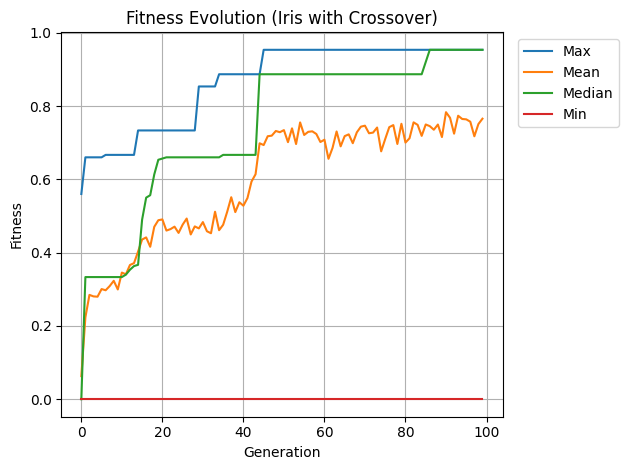

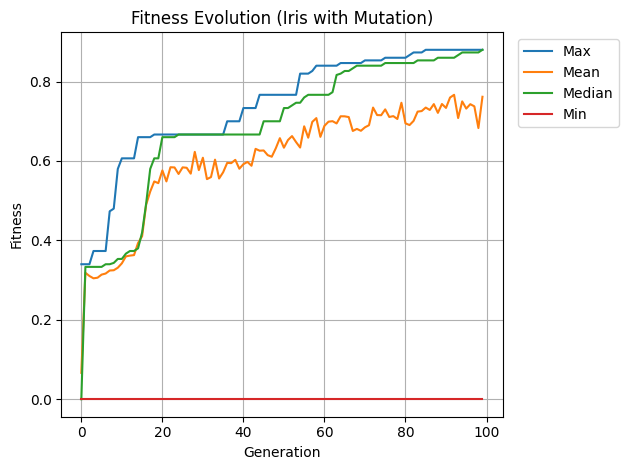

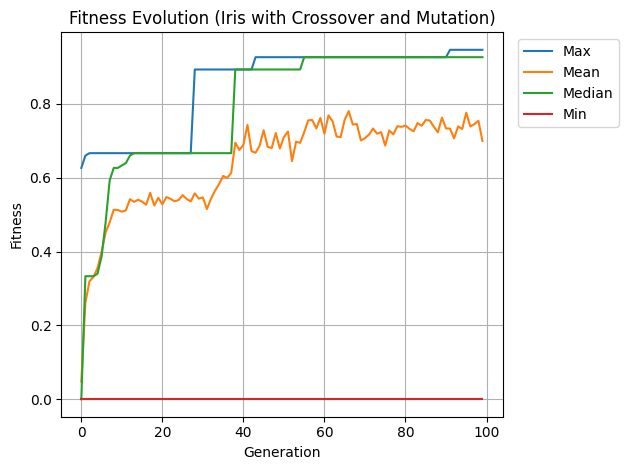

In [8]:
plot_fitness_benchmarks("../assets/benchmarks/iris_default", "Iris without Crossover or Mutation", 0)
plot_fitness_benchmarks("../assets/benchmarks/iris_crossover", "Iris with Crossover", 0)
plot_fitness_benchmarks("../assets/benchmarks/iris_mutation", "Iris with Mutation", 0)
plot_fitness_benchmarks("../assets/benchmarks/iris_full", "Iris with Crossover and Mutation", 0)

# plot_fitness_benchmarks("../assets/benchmarks/cart-pole-default", "Cart Pole GP", 0)
# plot_fitness_benchmarks("../assets/benchmarks/cart-pole-q", "Cart Pole Q-Learning", 0)
# plot_fitness_benchmarks("../assets/benchmarks/mountain-car-default", "Mountain Cart GP", -200)
# plot_fitness_benchmarks("../assets/benchmarks/mountain-car-q", "Mountain Car Q-Learning", -200)